In [1]:
from polyglot.text import Text   #形態素解析

from nltk.tokenize import sent_tokenize

import numpy as np

import pandas as pd

import re  #正規表現

#プロット
%matplotlib inline
import matplotlib.pyplot as plt

## 多読本のデータの読み込み

In [3]:
def read_txt(filepath):
    f = open(filepath, 'r', encoding='UTF-8')
    data = f.read()
    f.close()
    return data

text1 = read_txt("pdfToTextData/ProwsePhilip_2005_LADective_LADetective.txt")
text2 = read_txt("pdfToTextData/WhitneyNorman_2005_SaraSaysNo_SaraSaysNo.txt")
text3 = read_txt("pdfToTextData/CollinsAnne_2002_1TheMarchSisters_LittleWomen.txt")
text4 = read_txt("pdfToTextData/CollinsAnne_2009_1TheEarlyYears_PrincessDiana.txt")
text5 = read_txt("pdfToTextData/CornishFH_1993_1EbenezerScrooge_AChristmasCarol.txt")
text6 = read_txt("pdfToTextData/ColbournStephen_2005_ROOM13_Room13AndOtherGhostSt.txt")
text7 = read_txt("pdfToTextData/EscottJohn_2007_1GabrielOak_FarFromTheMaddingCrow.txt")
text8 = read_txt("pdfToTextData/AdamsPatrick_2010_1EarlyBallGames_KickOff.txt")
text9 = read_txt("pdfToTextData/ProwsePhilip_2005_1EarlyMorning_BristolMurder.txt")
text10 = read_txt("pdfToTextData/CollinsAnne_2002_1AnEarlyMorningVisito_TheSpeckledBandAndOth.txt")
text11 = read_txt("pdfToTextData/TarnerMargaret_2007_1AnUnhappyMarriage_AnnaKarenina.txt")
text12 = read_txt("pdfToTextData/ProwsePhilip_1999_1ThePurplePalace_LAMovie.txt")

### データフレームに整形

In [16]:
columns_name = ['Title','ISBM','bodyText','Publisher level','YL']

text_data = [
    ['L.A. Detective', '9780230035812', text1, 1, 0.8],
    ['Sara Says No!', '9780230035867', text2, 1, 0.8],
    ['Little Women', '9780230035003', text3, 2, 1.8],
    ['Princess Diana', '9780230716513', text4, 2, 2.0],
    ['A Christmas Carol', '9781405072588', text5, 3, 2.8],
    ['Room 13 and Other Ghost Stories', '9780230035126', text6, 3, 2.8],
    ['Far From the Madding Crowd', '9780230030527', text7, 4, 3.4],
    ['Kick Off!', '9780230400498', text8, 4, 3.4],
    ['Bristol Murder', '9780230035195', text9, 5, 3.8],
    ['The Speckled Band and Other Stories', '9780230030480', text10, 5, 3.8],
    ['Anna Karenina', '9781405087247', text11, 6, 4.8],
    ['L.A. Movie', '9780230030558', text12, 6, 4.8]
]

df = pd.DataFrame(text_data)
df.columns = columns_name

df

,Title,ISBM,bodyText,Publisher level,YL
0,L.A. Detective,9780230035812,My name is Lenny Samuel.\nMy friends call me L...,1,0.8
1,Sara Says No!,9780230035867,Weleome to Middletown! It is Monday\nmorning. ...,1,0.8
2,Little Women,9780230035003,"‘We are poor,’ said Meg, the eldest gir...",2,1.8
3,Princess Diana,9780230716513,good friends with Prince Charles’s younge...,2,2.0
4,A Christmas Carol,9781405072588,It was three o’clock in the afternoon o...,3,2.8
5,Room 13 and Other Ghost Stories,9780230035126,ROOM 13\n\nViborg is a city in Denmark. It is ...,3,2.8
6,Far From the Madding Crowd,9780230030527,Gabriel Oak\n\nhead was in her arms and ...,4,3.4
7,Kick Off!,9780230400498,Early Ball Games\n\nsoldiers played on a recta...,4,3.4
8,Bristol Murder,9780230035195,Peter got back into the lorry and drove out of...,5,3.8
9,The Speckled Band and Other Stories,9780230030480,An Early Morning Visitor for Holmes\n\nFor man...,5,3.8


## 文章を数値データへ

#### 形態素解析のときのメモ
- 空白と改行が入っていても正常に形態素解析が行われる

In [40]:
#クリーニング（テキスト中の記号除去）
def cleaning_text(text):
    code_regex = re.compile('[!"#$%&\'\\\\()*+,\/:;<=>?@[\\]^_`{|}~「」〔〕“”‘’〈〉『』【】＆＊・（）＄＃＠—–、？！｀＋￥％]')
    
    cleaned_text = code_regex.sub('', text)
    
    cleaned_text = cleaned_text.replace('-', ' ').replace('\'s', '')
    
    return cleaned_text

df['bodyText'] = df['bodyText'].apply(cleaning_text)



#形態素解析
def morphologicalAnalysis(text):
    tokens = Text(text)
    
    tag_list = []
    for token in tokens.pos_tags:
            tag_list.append(token[1])
    return tag_list

df['maText'] = df['bodyText'].apply(morphologicalAnalysis)




#ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tag_list = ['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'VERB']
le.fit(tag_list)

def labelEncoding(maText):
    maText = list(filter(lambda element: element != 'X', maText))
    maText = list(filter(lambda element: element != 'SYM', maText))
    
    num_tag = le.transform(maText) 
    return num_tag

df['text NumData'] = df['maText'].apply(labelEncoding)

df

,Title,ISBM,bodyText,Publisher level,YL,maText,text NumData
0,L.A. Detective,9780230035812,My name is Lenny Samuel.\nMy friends call me L...,1,0.8,"[PRON, NOUN, VERB, PROPN, PROPN, PUNCT, PRON, ...","[10, 7, 14, 11, 11, 12, 10, 7, 14, 10, 11, 12,..."
1,Sara Says No!,9780230035867,Weleome to Middletown It is Monday\nmorning. E...,1,0.8,"[NOUN, ADP, PROPN, PRON, VERB, PROPN, NOUN, PU...","[7, 1, 11, 10, 14, 11, 7, 12, 10, 14, 1, 5, 7,..."
2,Little Women,9780230035003,We are poor said Meg the eldest girl. ...,2,1.8,"[PRON, AUX, ADJ, VERB, PROPN, DET, ADJ, NOUN, ...","[10, 3, 0, 14, 11, 5, 0, 7, 12, 10, 14, 0, 12,..."
3,Princess Diana,9780230716513,good friends with Prince Charless younger...,2,2.0,"[ADJ, NOUN, ADP, PROPN, PUNCT, ADJ, NOUN, PROP...","[0, 7, 1, 11, 12, 0, 7, 11, 11, 12, 8, 7, 4, 7..."
4,A Christmas Carol,9781405072588,It was three oclock in the afternoon on...,3,2.8,"[PRON, VERB, NUM, NUM, ADP, DET, NOUN, ADP, DE...","[10, 14, 8, 8, 1, 5, 7, 1, 5, 7, 1, 11, 11, 7,..."
5,Room 13 and Other Ghost Stories,9780230035126,ROOM 13\n\nViborg is a city in Denmark. It is ...,3,2.8,"[NOUN, NUM, PROPN, VERB, DET, NOUN, ADP, PROPN...","[7, 8, 11, 14, 5, 7, 1, 11, 12, 10, 14, 5, 0, ..."
6,Far From the Madding Crowd,9780230030527,Gabriel Oak\n\nhead was in her arms and ...,4,3.4,"[PROPN, PROPN, PROPN, VERB, ADP, PRON, NOUN, C...","[11, 11, 11, 14, 1, 10, 7, 4, 10, 3, 14, 5, 7,..."
7,Kick Off!,9780230400498,Early Ball Games\n\nsoldiers played on a recta...,4,3.4,"[ADJ, PROPN, PROPN, NOUN, VERB, ADP, DET, ADJ,...","[0, 11, 11, 7, 14, 1, 5, 0, 7, 1, 7, 14, 5, 8,..."
8,Bristol Murder,9780230035195,Peter got back into the lorry and drove out of...,5,3.8,"[PROPN, VERB, ADV, ADP, DET, NOUN, CONJ, VERB,...","[11, 14, 2, 1, 5, 7, 4, 14, 1, 1, 5, 7, 12, 11..."
9,The Speckled Band and Other Stories,9780230030480,An Early Morning Visitor for Holmes\n\nFor man...,5,3.8,"[DET, ADJ, NOUN, PROPN, ADP, PROPN, ADP, ADJ, ...","[5, 0, 7, 11, 1, 11, 1, 0, 7, 10, 14, 5, 0, 7,..."


-----

In [41]:
#データ保存

file_name = 'dataframe'
df.to_csv('./ER-numData/' + file_name + '.csv')

## ~~形態素（数値にエンコード済み）をプロット~~

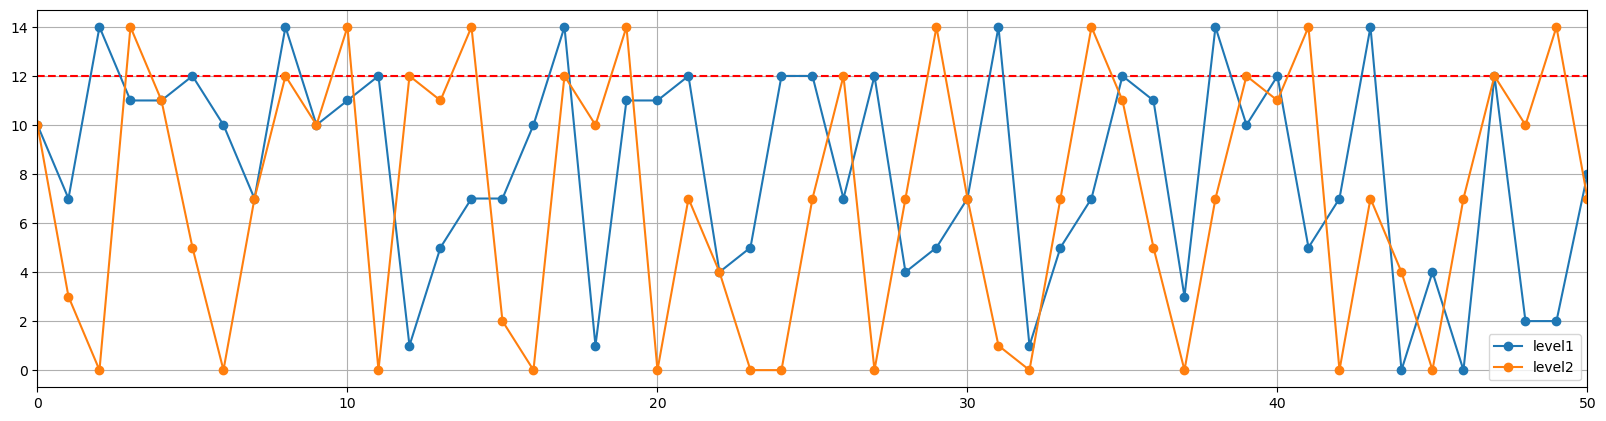

In [48]:
data1 = df.at[0, 'text NumData']
data2 = df.at[2, 'text NumData']
data3 = df.at[4, 'text NumData']
data4 = df.at[6, 'text NumData']
data5 = df.at[8, 'text NumData']
data6 = df.at[10, 'text NumData']


plt.figure(figsize=(20, 5), dpi=100)
plt.plot(data1, 'o', linestyle='-', label = "level1")
plt.plot(data2, 'o', linestyle='-', label = "level2")
# plt.plot(data3, 'o', linestyle='-', label = "level3")
# plt.plot(data4, 'o', linestyle='-', label = "level4")
# plt.plot(data5, 'o', linestyle='-', label = "level5")
#plt.plot(data6, 'o', linestyle='-', label = "level6")
#plt.plot(data7, 'o', linestyle='-', label = "level6")

plt.legend()

x_min = 0
x_max = 50

p = plt.hlines([12], x_min, x_max, "red", linestyles='dashed')     # hlines

plt.xlim(x_min, x_max) #x軸範囲指定
plt.grid(True)

plt.show()

## ~~コサイン類似度~~

In [54]:
def cosin_similarity(x, y):
    
    return np.dot(x, y)/(np.sqrt(np.dot(x, x))*np.sqrt(np.dot(y, y)))

cosin_similarity(data1[:50], data6[:50])

0.6598963411181302

In [61]:
a = 123

print(a)
type(f'{a}')

a10_7_14 = 'aaa'
print(a10_7_14)

123
aaa
